<a href="https://colab.research.google.com/github/yayanberutu/face_spoofing_detection_fasterrcnn/blob/master/image_bounding_box.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from skimage import io
from shutil import copyfile
import sys
import time
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
drive.mount('/content/drive')

**Display Gambar**

In [ ]:
def display(img, stat):
    #if stat == '1':
          #tipe = 'spoof'
    #else:
          #tipe = 'live'      
    #plt.imshow(img), plt.title(tipe)
    plt.imshow(img), plt.title(stat)
    plt.show()


**Denoise Gambar**

In [ ]:
def denoise(img):
      denoise_img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15)
      return denoise_img

**Resize Gambar**

In [ ]:
def resize(img, height, width):
      resize_img = cv2.resize(img, (width, height), interpolation=cv2.INTER_NEAREST)
      return resize_img

**Get semua URL gambar**

In [ ]:
base_url = '/content/drive/MyDrive/Semester 6/TA/DATASET/'

In [ ]:
def get_data(path):
      with open(path, 'r') as f:
            print('mengambil file')
            for data in f:
                  split = data.strip('\n').split(' ')
                  url, x1, y1, x2, y2, class_name = split 
                  #print(url)
                  #url = url.replace('.jpg', '_BB.txt')
                  #print(url)
                  url = base_url + url
                  #print(url)
                  split[0] = url
                  plot_bbox(split)
                  #print(stat)

In [ ]:
path = '/content/drive/MyDrive/Semester 6/TA/DATASET/metas/intra_test/train_dummy.txt'

mengambil file
['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/2623/live/000000.jpg', '77', '11', '48', '59', 'live']


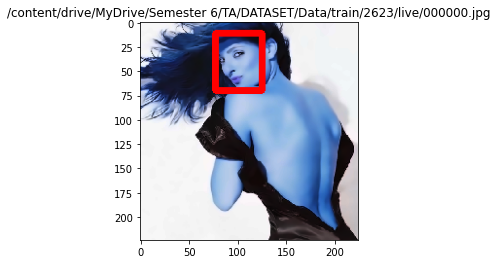

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/5489/spoof/000001.jpg', '105', '75', '42', '47', 'spoof']


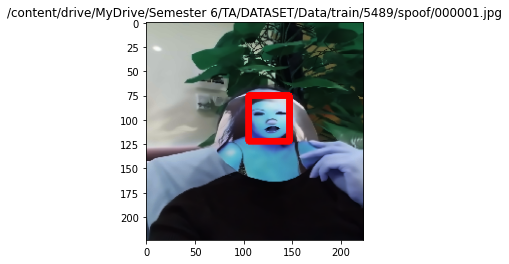

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/7149/spoof/000002.jpg', '39', '45', '105', '128', 'spoof']


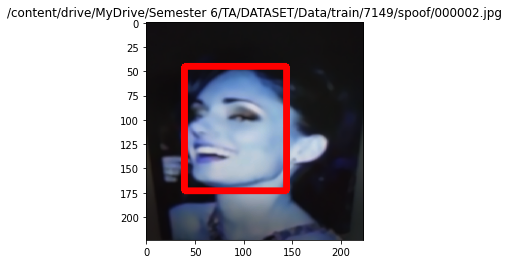

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/4980/spoof/000003.jpg', '15', '30', '146', '166', 'spoof']


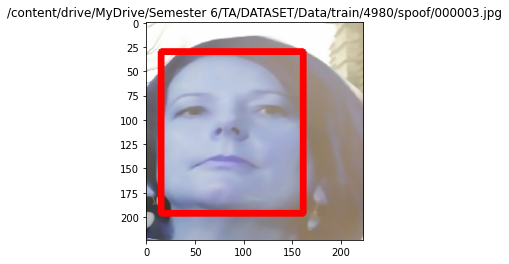

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/7124/spoof/000004.jpg', '35', '82', '54', '68', 'spoof']


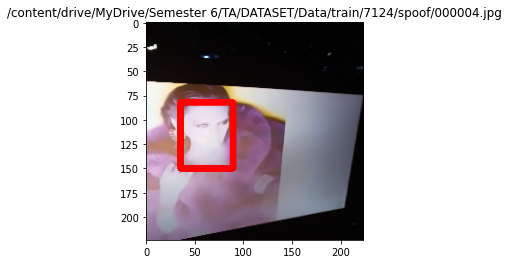

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/7013/live/000005.jpg', '78', '36', '80', '94', 'live']


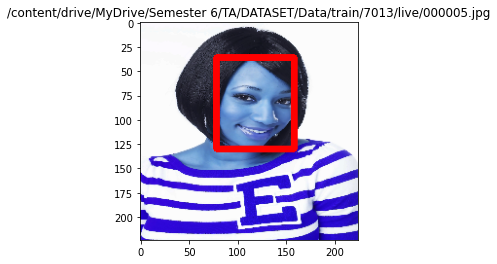

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/1857/live/000006.jpg', '88', '23', '46', '74', 'live']
['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/8206/spoof/000007.jpg', '137', '108', '43', '46', 'spoof']


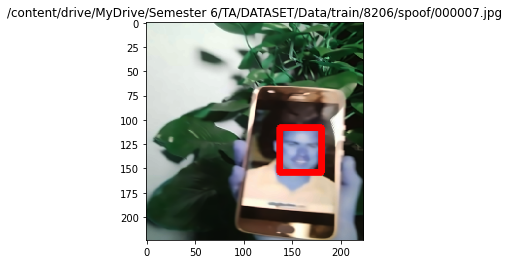

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/6980/spoof/000008.jpg', '79', '51', '99', '123', 'spoof']


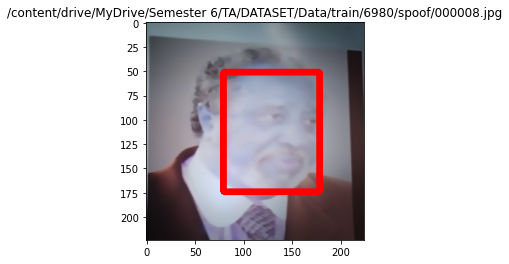

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/5319/live/000009.jpg', '52', '40', '86', '98', 'live']


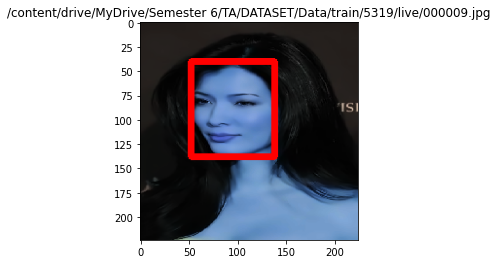

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/2710/spoof/000010.jpg', '54', '50', '122', '138', 'spoof']


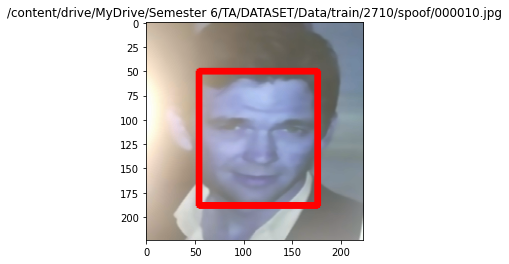

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/8032/spoof/000011.jpg', '53', '71', '127', '139', 'spoof']


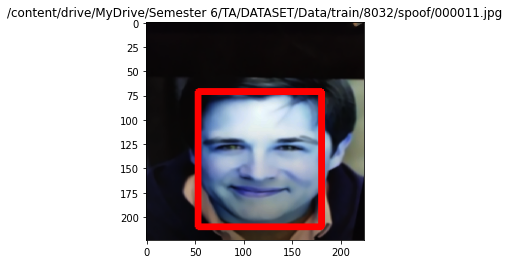

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/5817/live/000012.jpg', '78', '41', '65', '75', 'live']


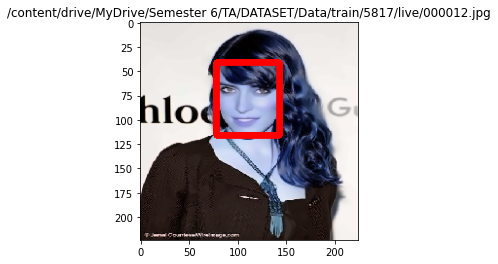

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/9575/spoof/000013.jpg', '60', '18', '82', '91', 'spoof']


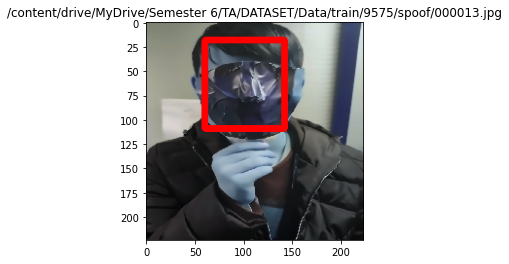

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/354/live/000014.jpg', '90', '18', '52', '57', 'live']


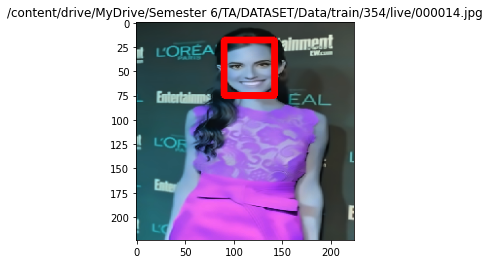

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/8134/spoof/000015.jpg', '63', '54', '92', '112', 'spoof']


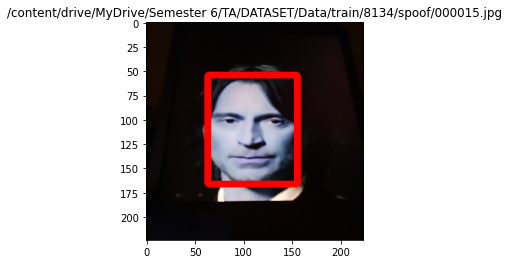

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/2015/spoof/000016.jpg', '59', '36', '101', '133', 'spoof']


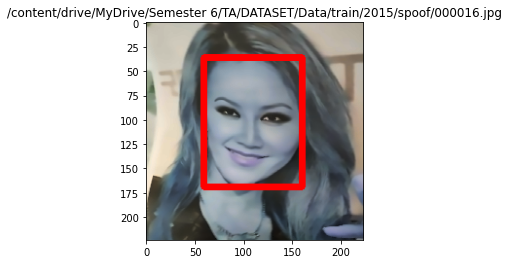

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/7657/live/000017.jpg', '58', '23', '72', '78', 'live']


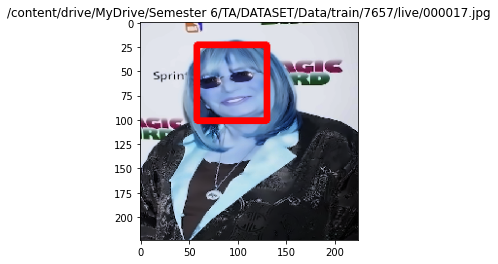

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/2672/spoof/000018.jpg', '93', '50', '96', '99', 'spoof']


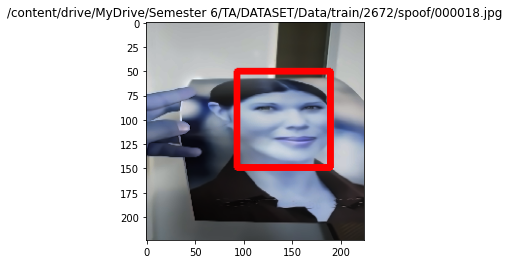

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/10044/live/000019.jpg', '83', '42', '68', '124', 'live']


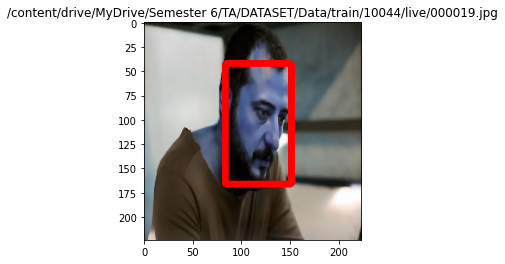

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/4206/spoof/000020.jpg', '95', '70', '70', '98', 'spoof']


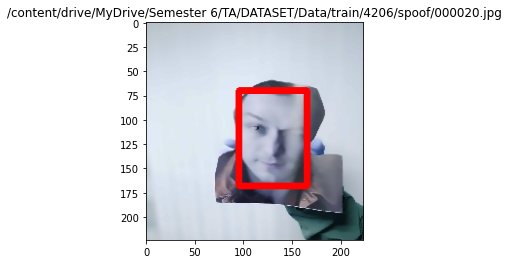

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/4175/spoof/000021.jpg', '56', '35', '88', '99', 'spoof']


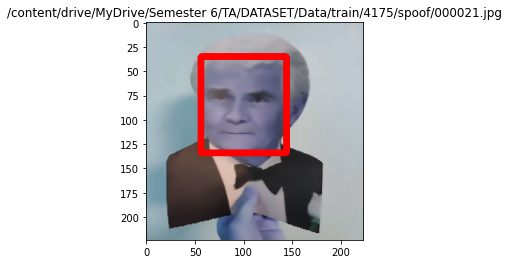

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/3287/spoof/000022.jpg', '124', '58', '63', '77', 'spoof']


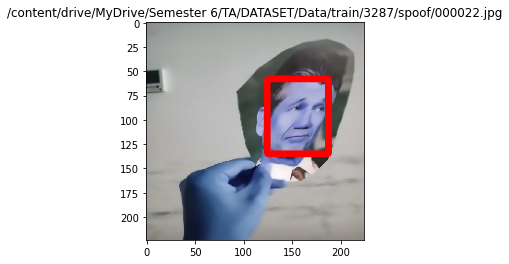

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/5776/spoof/000023.jpg', '115', '71', '72', '81', 'spoof']


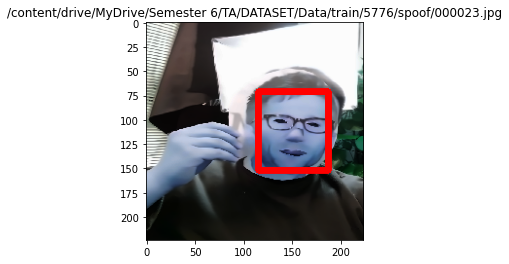

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/9995/spoof/000024.jpg', '94', '73', '61', '75', 'spoof']


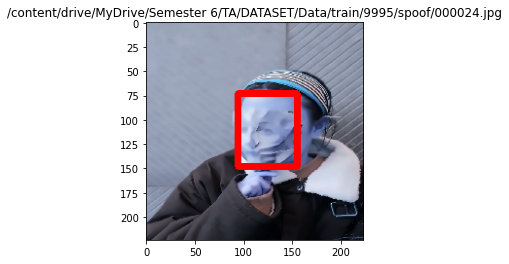

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/4255/spoof/000025.jpg', '83', '61', '29', '46', 'spoof']


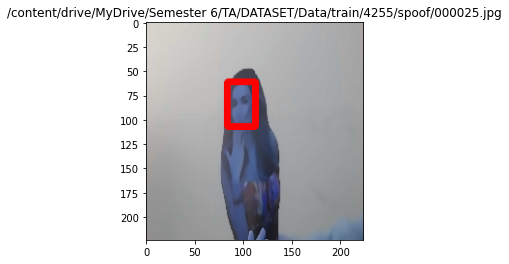

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/7897/spoof/000026.jpg', '40', '85', '133', '143', 'spoof']


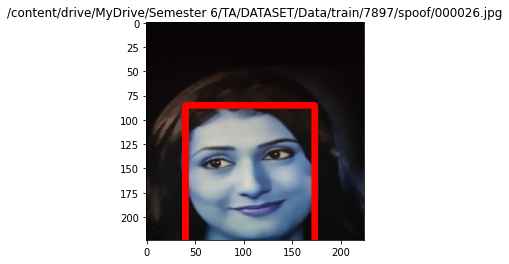

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/8451/spoof/000027.jpg', '44', '58', '73', '89', 'spoof']


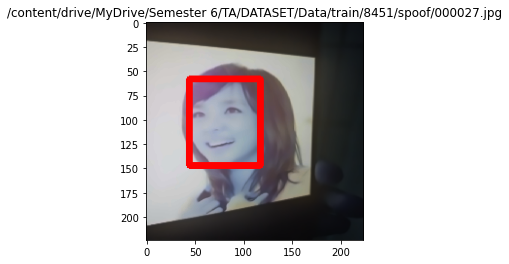

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/9778/spoof/000028.jpg', '68', '121', '72', '90', 'spoof']


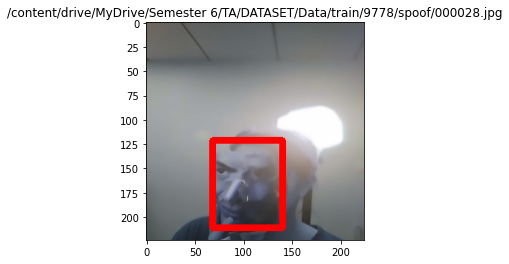

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/4449/spoof/000029.jpg', '53', '87', '95', '111', 'spoof']


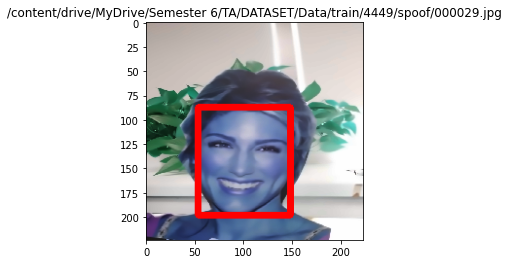

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/5939/spoof/000030.jpg', '59', '43', '101', '109', 'spoof']


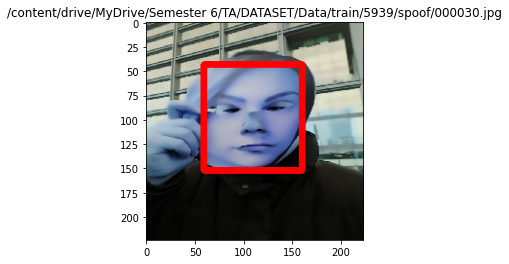

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/1603/spoof/000031.jpg', '101', '116', '59', '69', 'spoof']
['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/7476/live/000032.jpg', '53', '40', '94', '109', 'live']


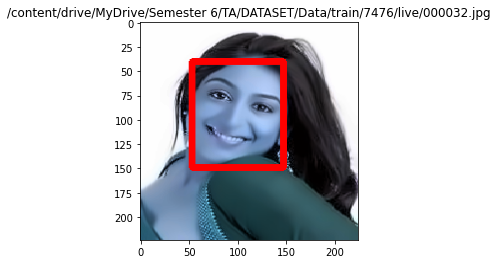

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/9441/spoof/000033.jpg', '32', '55', '125', '155', 'spoof']


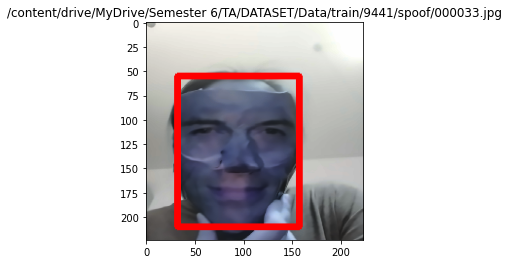

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/4212/spoof/000034.jpg', '100', '55', '96', '108', 'spoof']


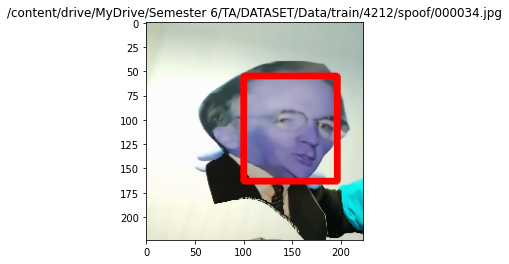

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/2417/spoof/000035.jpg', '57', '3', '95', '92', 'spoof']


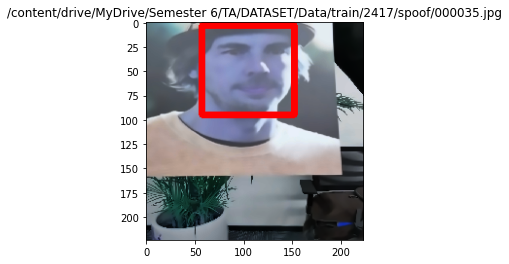

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/8687/live/000036.jpg', '69', '30', '86', '97', 'live']


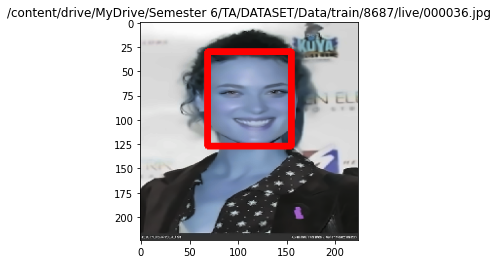

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/6449/spoof/000037.jpg', '72', '9', '78', '79', 'spoof']


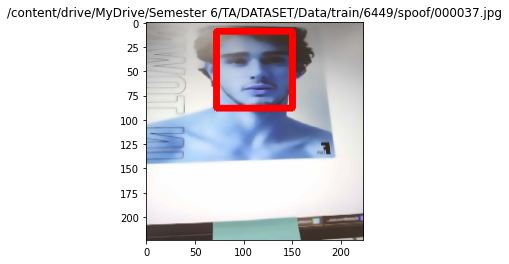

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/6571/spoof/000038.jpg', '128', '43', '75', '86', 'spoof']


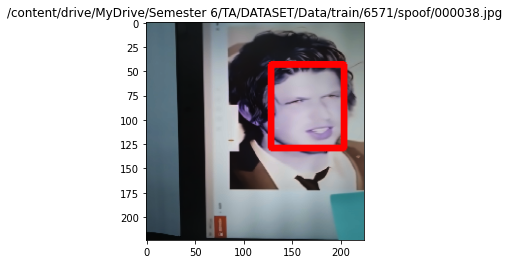

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/476/spoof/000039.jpg', '39', '71', '108', '117', 'spoof']
['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/4353/spoof/000040.jpg', '51', '83', '95', '118', 'spoof']


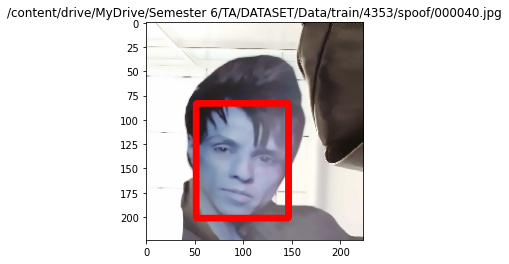

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/9544/spoof/000041.jpg', '63', '88', '77', '97', 'spoof']


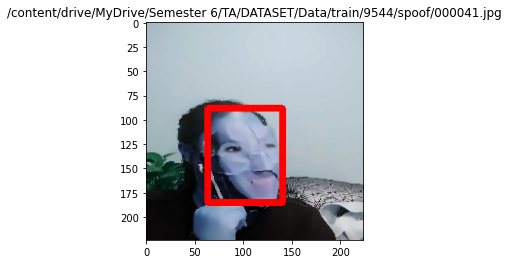

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/6142/live/000042.jpg', '83', '81', '62', '65', 'live']


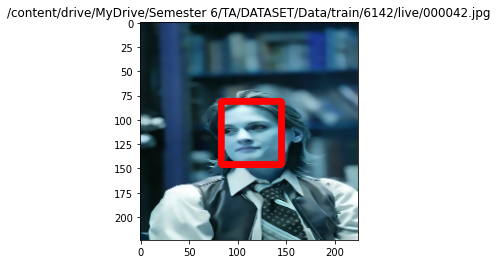

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/10149/spoof/000043.jpg', '67', '85', '73', '89', 'spoof']


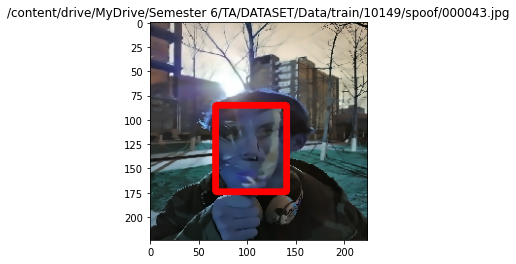

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/1854/spoof/000044.jpg', '36', '53', '151', '162', 'spoof']
['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/6927/spoof/000045.jpg', '60', '62', '76', '89', 'spoof']


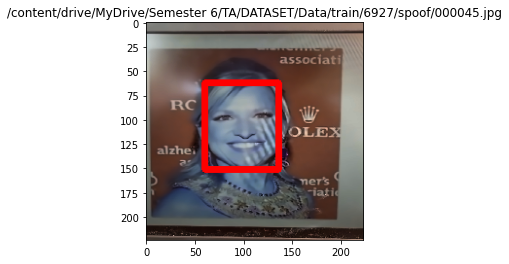

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/8014/spoof/000046.jpg', '22', '40', '151', '181', 'spoof']


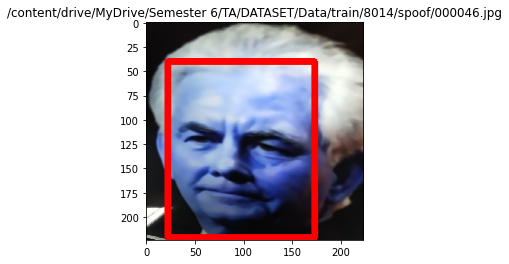

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/1035/live/000047.jpg', '36', '36', '98', '123', 'live']
['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/3070/spoof/000048.jpg', '14', '18', '154', '196', 'spoof']


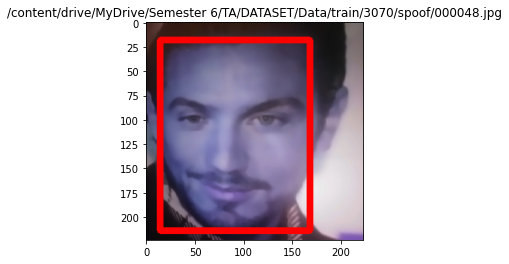

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/7654/live/000049.jpg', '55', '37', '106', '134', 'live']


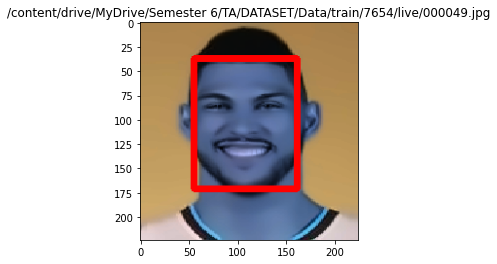

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/2635/spoof/000050.jpg', '38', '46', '140', '154', 'spoof']
['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/7904/spoof/000051.jpg', '86', '89', '51', '58', 'spoof']


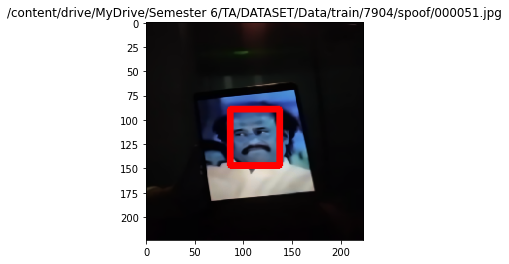

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/4852/spoof/000052.jpg', '91', '115', '62', '69', 'spoof']


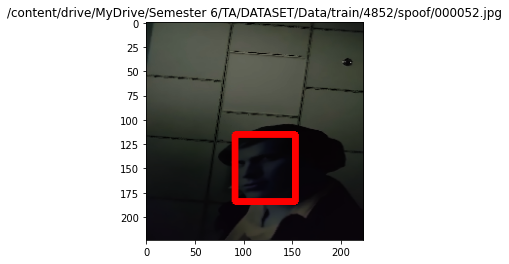

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/5739/live/000053.jpg', '87', '21', '46', '62', 'live']


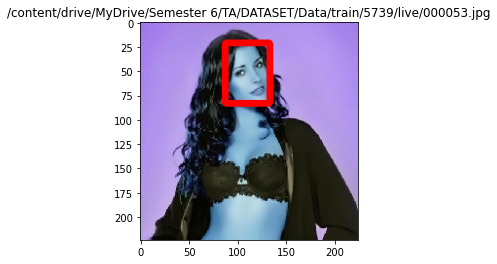

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/3800/spoof/000054.jpg', '69', '84', '57', '62', 'spoof']


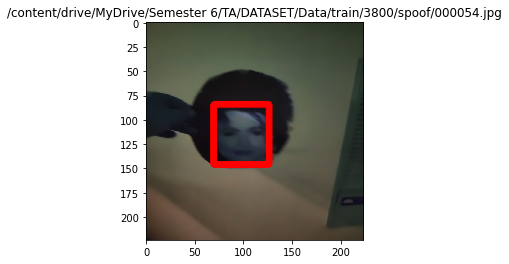

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/9103/spoof/000055.jpg', '40', '81', '100', '124', 'spoof']


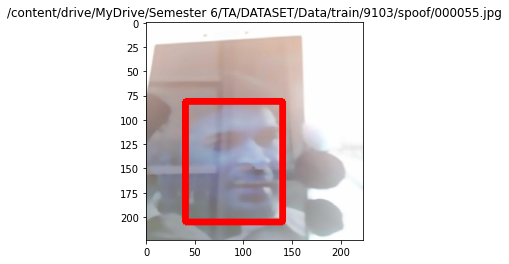

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/2076/live/000056.jpg', '62', '60', '97', '101', 'live']


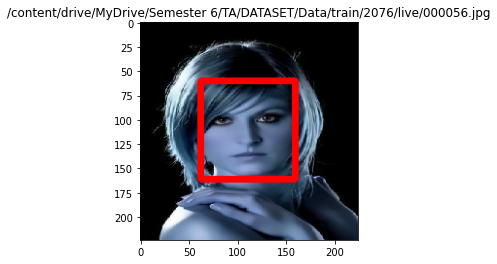

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/8876/live/000057.jpg', '58', '28', '101', '106', 'live']


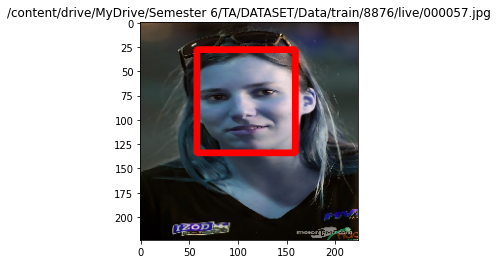

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/3353/live/000058.jpg', '87', '32', '47', '56', 'live']


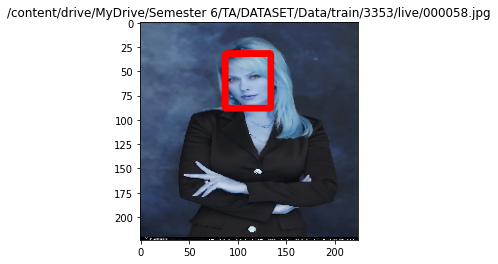

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/9429/spoof/000059.jpg', '76', '130', '72', '81', 'spoof']


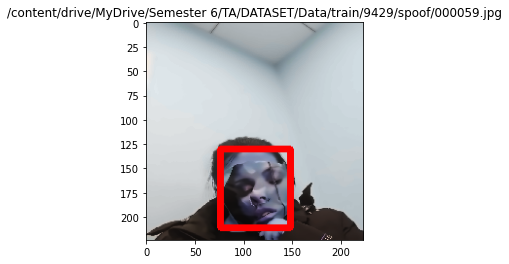

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/668/spoof/000060.jpg', '141', '43', '49', '55', 'spoof']
['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/5705/spoof/000061.jpg', '73', '57', '84', '91', 'spoof']


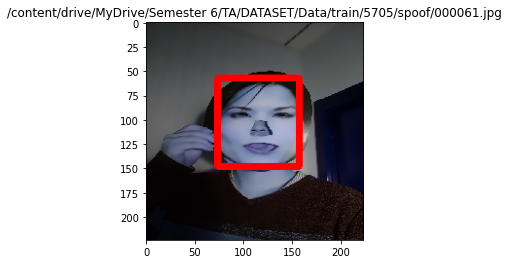

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/8733/live/000062.jpg', '71', '30', '80', '86', 'live']


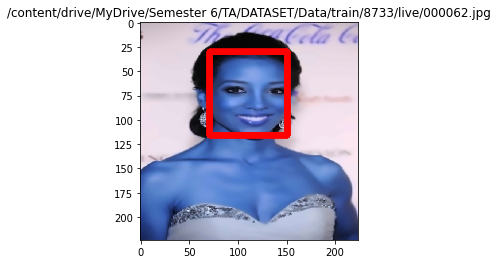

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/3102/spoof/000063.jpg', '91', '117', '67', '88', 'spoof']


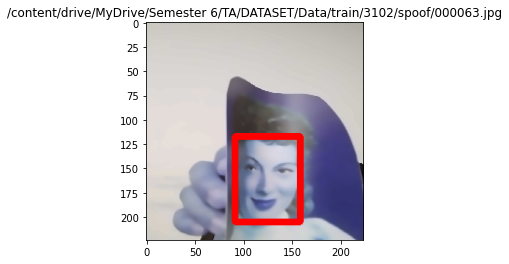

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/1603/live/000064.jpg', '93', '23', '28', '47', 'live']
['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/7011/spoof/000065.jpg', '82', '131', '51', '61', 'spoof']


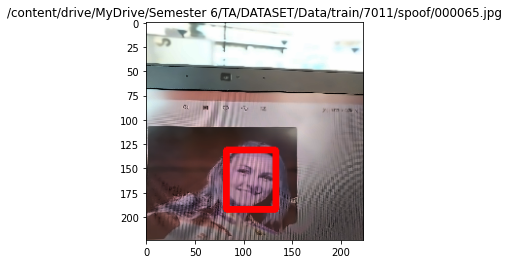

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/3792/spoof/000066.jpg', '30', '68', '92', '109', 'spoof']


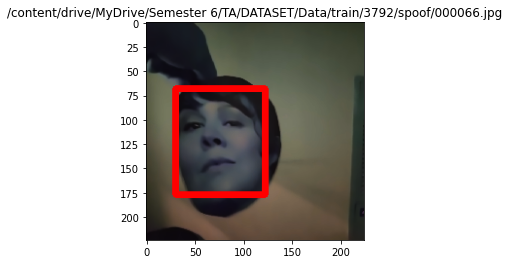

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/9582/spoof/000067.jpg', '72', '94', '75', '88', 'spoof']


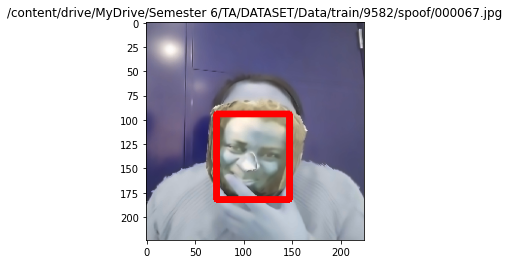

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/6681/spoof/000068.jpg', '21', '47', '75', '91', 'spoof']


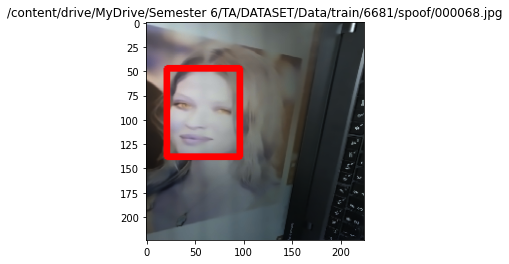

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/6429/spoof/000069.jpg', '24', '18', '89', '136', 'spoof']


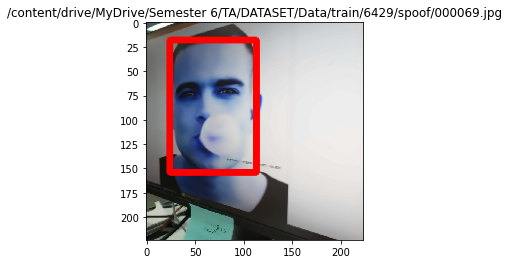

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/1611/spoof/000070.jpg', '14', '9', '154', '169', 'spoof']
['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/9858/spoof/000071.jpg', '55', '25', '102', '115', 'spoof']


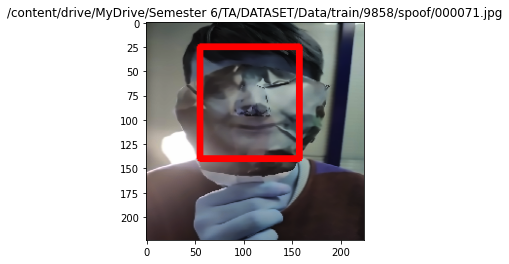

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/5118/spoof/000072.jpg', '39', '87', '101', '101', 'spoof']


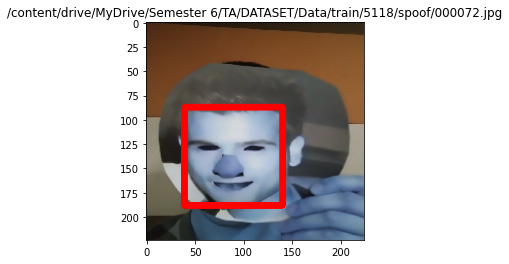

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/8111/spoof/000073.jpg', '61', '50', '124', '137', 'spoof']


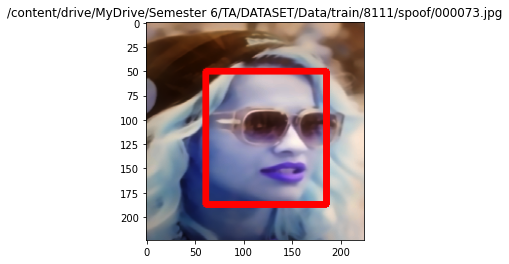

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/5860/live/000074.jpg', '60', '60', '107', '141', 'live']


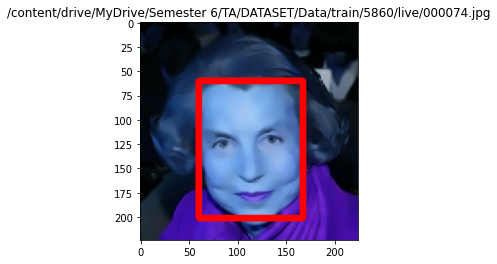

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/492/live/000075.jpg', '37', '28', '64', '71', 'live']
['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/8157/spoof/000076.jpg', '135', '123', '17', '16', 'spoof']


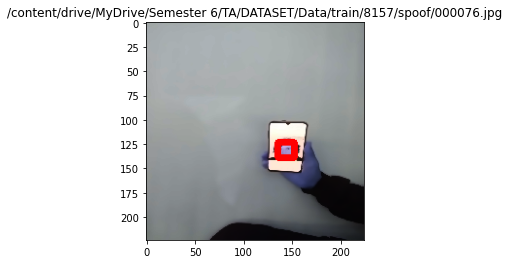

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/1107/spoof/000077.jpg', '78', '73', '58', '105', 'spoof']
['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/5515/spoof/000078.jpg', '72', '94', '62', '72', 'spoof']


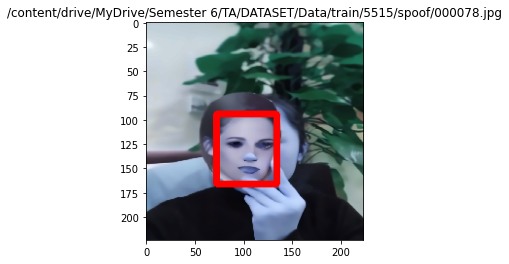

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/9834/spoof/000079.jpg', '63', '72', '78', '86', 'spoof']


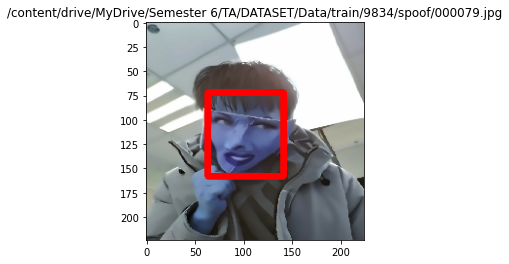

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/2141/spoof/000080.jpg', '54', '14', '109', '118', 'spoof']


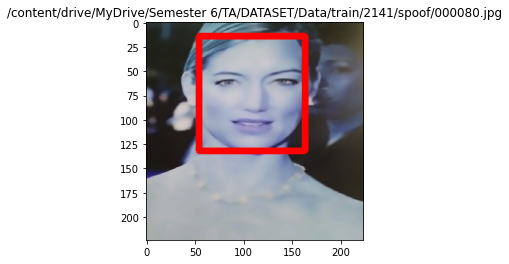

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/5096/spoof/000081.jpg', '71', '111', '67', '71', 'spoof']


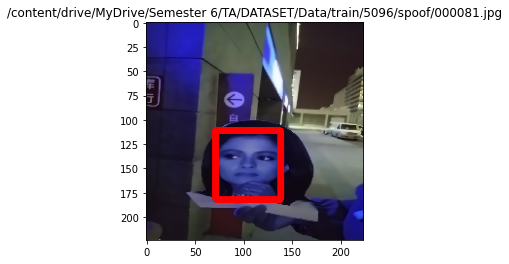

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/8744/spoof/000082.jpg', '137', '134', '19', '25', 'spoof']


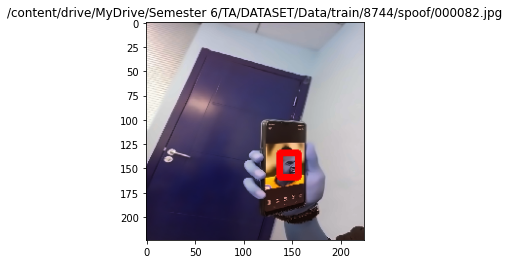

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/8919/live/000083.jpg', '58', '45', '78', '114', 'live']


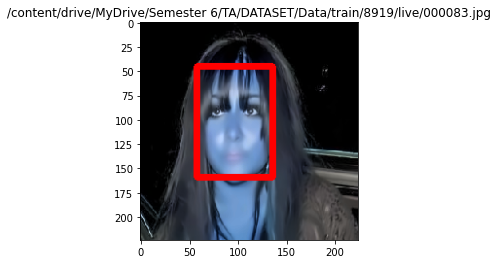

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/4758/spoof/000084.jpg', '85', '23', '74', '102', 'spoof']


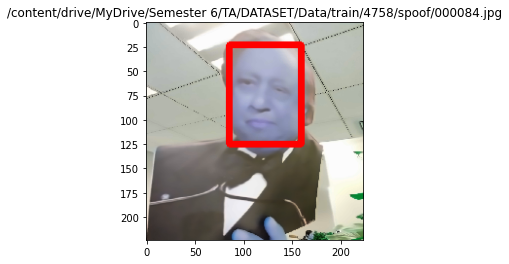

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/542/spoof/000085.jpg', '34', '52', '122', '123', 'spoof']
['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/7539/spoof/000086.jpg', '49', '67', '114', '111', 'spoof']


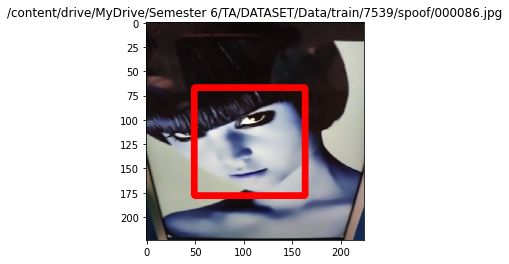

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/4433/spoof/000087.jpg', '72', '122', '50', '61', 'spoof']


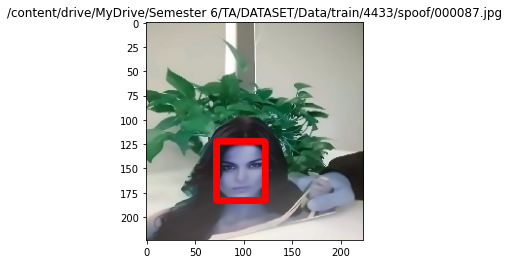

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/2410/spoof/000088.jpg', '30', '54', '83', '89', 'spoof']


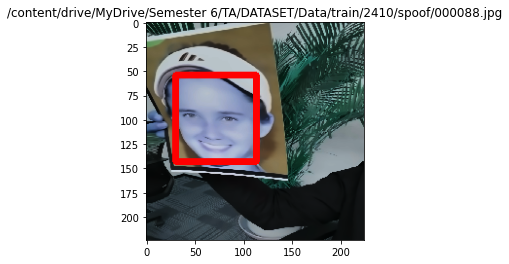

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/7647/spoof/000089.jpg', '142', '29', '51', '64', 'spoof']


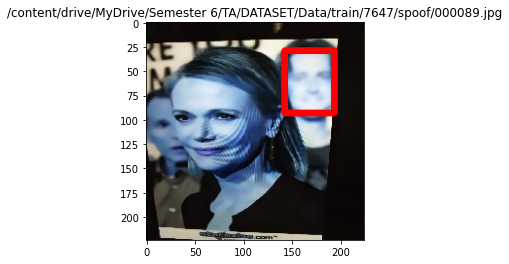

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/5109/spoof/000090.jpg', '59', '44', '61', '87', 'spoof']


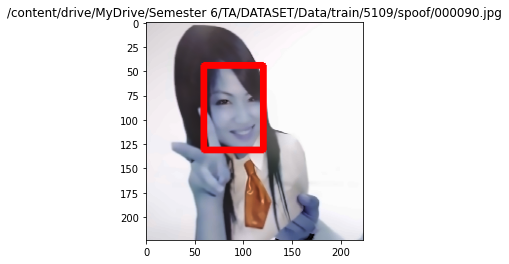

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/7582/live/000091.jpg', '41', '38', '56', '70', 'live']


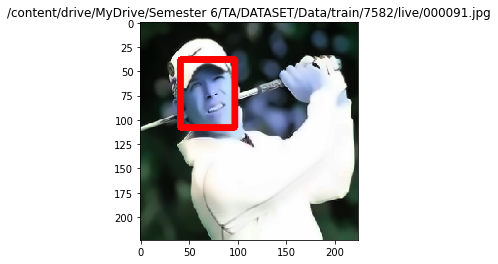

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/1786/spoof/000092.jpg', '46', '73', '118', '146', 'spoof']
['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/8112/spoof/000093.jpg', '66', '67', '80', '74', 'spoof']


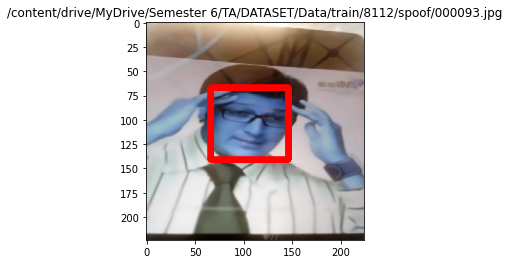

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/486/spoof/000094.jpg', '107', '3', '56', '68', 'spoof']
['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/1011/spoof/000095.jpg', '54', '53', '130', '156', 'spoof']
['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/4734/spoof/000096.jpg', '72', '58', '107', '114', 'spoof']


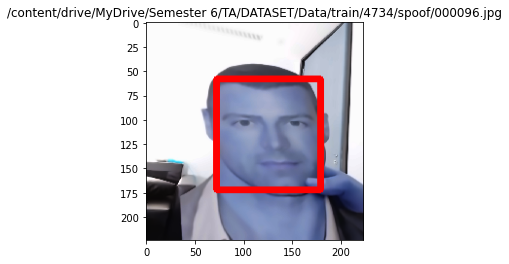

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/7870/spoof/000097.jpg', '38', '30', '136', '166', 'spoof']


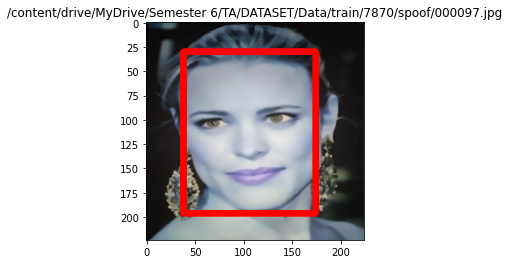

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/8422/live/000098.jpg', '65', '38', '85', '134', 'live']


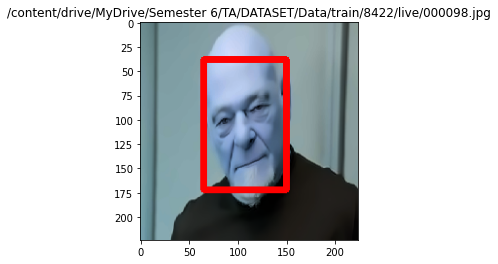

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/2028/live/000099.jpg', '140', '18', '30', '51', 'live']


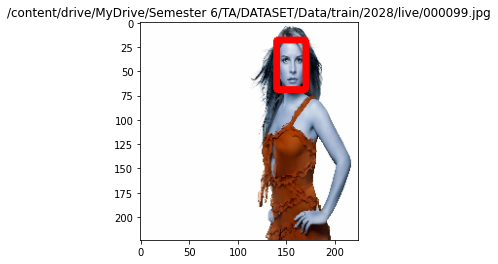

['/content/drive/MyDrive/Semester 6/TA/DATASET/Data/train/1138/spoof/000100.jpg', '44', '68', '109', '125', 'spoof']


In [ ]:
global path
get_data(path)

**Membuat Bounding Box**

In [ ]:
def plot_bbox(data_img):
  #print(data_img[2:6])
  print(data_img)
  url_gambar = data_img[0]
  img = cv2.imread(url_gambar)
  if img is not None:
    img = denoise(img)
    img = resize(img, 224, 224)
    (c, r) = img.shape[:2]
    #print(c, r)
    xmin, ymin, w, h  = data_img[1:5] 
    xmin, ymin, w, h = int(xmin), int(ymin), int(w), int(h)
  #   #print(type(xmin))
    
    height, width, channel = img.shape
    cv2.rectangle(img, (xmin, ymin), (xmin+w, ymin+h), (255,0,0), 5)
    
    display(img, data_img[0])
  #print(data_img)

In [ ]:
lst_nama = "Yayan D3TI Aspa\nJeje D4TRPL Aspi\nNennen D3TI Aspi"

In [ ]:
with open(path, 'r') as f:
  print('mengambil file')
  for data in f:
    split = data.strip('\n').split(' ')
    url, stat = split 
    url = url.replace('.jpg', '_BB.txt')
    url = base_url + url
    split[0] = url
    print(split)
    try:
      with open(url, 'r') as f2:
        for data2 in f2:
          split2 = data2.strip('\n').split(' ')
          #print(split2)
    except FileNotFoundError:
            #print('file tidak bisa ditemukan!')
            continue
    else:
          #   plot_bbox(split + split2)
          print(split2)

In [ ]:
print(split)

In [ ]:
st = {12, 1, 5, 55, 55, 23, 1, 12, 5}

In [ ]:
print(st)

In [ ]:
str = "yosepri disyandro berutu"

In [ ]:
str.replace("yosepri", "yayan")

In [ ]:
print(str)